<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/4_3_3_heatmaps_PM_MZM_analise_N_19_21_23_comp_experimetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tamanho de amostras do df 22049


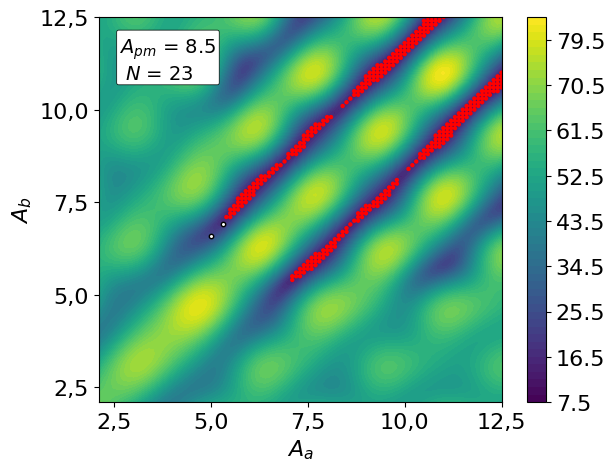

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator, AutoLocator, ScalarFormatter
from matplotlib.ticker import FuncFormatter
# Função para formatar os rótulos dos eixos com vírgula como separador decimal
def format_comma(x, pos):
    return f'{x:.1f}'.replace('.', ',')



# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_4_3_3_all_values_PM_MZM_N_23_Apm_8.5_Ax_2_1_12_5.csv'
#url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_4_3_3_all_values_PM_MZM_N_21_Apm_8.5_Ax_2_1_12_5.csv'

# Valores específicos
Apm_value = 8.5
CV = 16  # CV superior
N_used = 23


color_cmap ='viridis' #'OrRd'  # cor do mapa verdecito 'viridis'
point_color = 'red'  # cor dos pontos 'blue'

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
subset = dfN15[dfN15['B'] == Apm_value]  # Cria um subset com o Apm

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(6.5, 5))
contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap= color_cmap) # cmap='viridis')
plt.colorbar(contour)

# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color = point_color, s=10, edgecolors='none', label=f'E <= {CV}')  # Sem bordas nos marcadores

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = {N_used}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))

# Acessar o objeto de eixos atual
ax = plt.gca()
# Configurar o número de ticks
ax.xaxis.set_major_locator(MaxNLocator(5))  # Definir 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(5))  # Definir 6 ticks no eixo Y


# Aa1 = 7.5; Ab1 = 7.5
Aa2 = 5.3; Ab2 = 6.9
Aa3 = 5.0; Ab3 = 6.6
#Aa4 = 9.07; Ab4 = 7.5
# Marcar o ponto (4,5)
# plt.scatter(Aa1, Ab1, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa3, Ab3, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
#plt.scatter(Aa4, Ab4, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Adicionando legenda
#plt.legend()

plt.show()



In [320]:
# Valores específicos para B e C que você deseja usar para encontrar o valor correspondente em D
Aa = 3.2  # Substitua por seu valor específico
Ab = 4.8   # Substitua por seu valor específico
# Filtrar o DataFrame para as linhas onde B e C têm os valores especificados
CVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['E'].iloc[0]
print("CV fix:", round(CVfx,2))

AVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['F'].iloc[0]
print("AV fix:", round(AVfx,2))


CV fix: 44.41
AV fix: 4.78


Numero de dados low_e_points 330
AV max = 2.7
AV min = 1.16


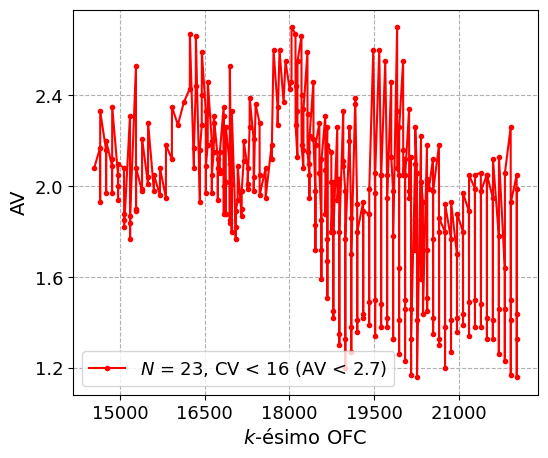

In [321]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(6,5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'r.-', label=f'$N$ = {N_used}, CV < {CV} (AV < {max_va})')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
#ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='lower left', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

tamanho de amostras do df 11024


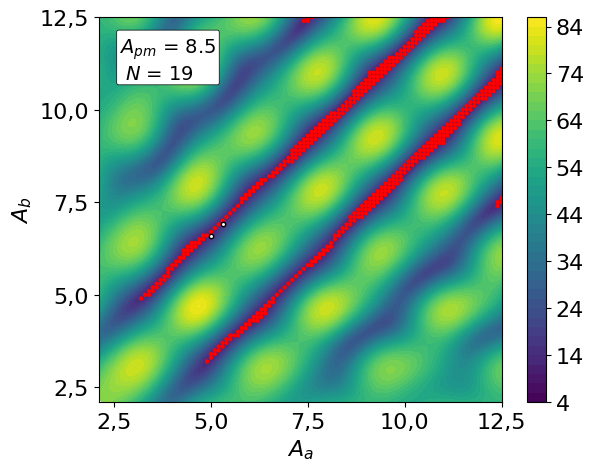

In [322]:
# Valores específicos

#CV1 = 11  # Substitua 'valor_especifico_CV' limite superior FR
# Filtrar dados para o valor específico de Apm

# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_4_3_3_all_values_PM_MZM_N_19_Apm_8.5_Ax_2_1_12_5.csv'
#url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9_Apm_3_Ax_0.1_a_12.5.csv'

Apm_value = 8.5
CV1 = 14 #14.315
N_used1 = 19

#color_cmap ='OrRd'  # cor do mapa
#point_color = 'red'  # cor dos pontos

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
subset = dfN15[dfN15['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(6.5, 5))
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap=color_cmap) # cmap='viridis')
plt.colorbar(contour)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV1]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color= point_color , s=10 , edgecolors='none', label=f'E < {CV1}')  # Sem bordas nos marcadores, color='r', marker='.')

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = {N_used1}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))


#Aa1 = 7.5; Ab1 = 7.5
Aa2 = 5.3; Ab2 = 6.9
Aa3 = 5.0; Ab3 = 6.6
#Aa4 = 9.07; Ab4 = 7.5
# Marcar o ponto (4,5)
#plt.scatter(Aa1, Ab1, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa3, Ab3, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
#plt.scatter(Aa4, Ab4, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Acessar o objeto de eixos atual
ax = plt.gca()
# Configurar o número de ticks
ax.xaxis.set_major_locator(MaxNLocator(5))  # Definir 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(5))  # Definir 6 ticks no eixo Y


# Adicionando legenda
#plt.legend()

plt.show()


In [323]:
# Valores específicos para B e C que você deseja usar para encontrar o valor correspondente em D
Aa = 3.2  # Substitua por seu valor específico
Ab = 4.8  # Substitua por seu valor específico
# Filtrar o DataFrame para as linhas onde B e C têm os valores especificados
CVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['E'].iloc[0]
print("CV fix:", round(CVfx,2))

AVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['F'].iloc[0]
print("AV fix:", round(AVfx,2))

CV fix: 15.41
AV fix: 2.01


Numero de dados low_e_points 438
AV max = 2.19
AV min = 0.72


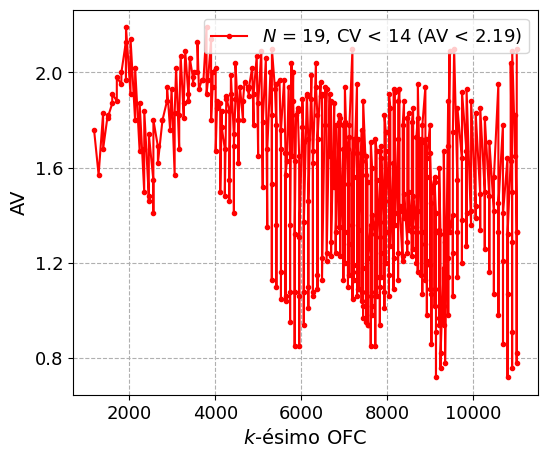

In [324]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV1]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(6,5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'r.-', label=f'$N$ = {N_used1}, CV < {CV1} (AV < {max_va})')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
#ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='upper right', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico